In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("vid18_180219.dat")

#Se pide trabajar con dos columnas

data1 = data.filter(['TIMESTAMP','AirTC_Avg'],axis=1)


data1['FECHA'] = pd.to_datetime(data1.apply(lambda x: x['TIMESTAMP'],\
  1), dayfirst=True)
data1 = data1.drop(['TIMESTAMP'], 1)
data1.head()

# Separamos los valores de la columna TIMESTAMP

#Extraer año, día y hora de FECHA
data1['AÑO'] = data1['FECHA'].dt.year
data1['MES'] = data1['FECHA'].dt.month
data1['DIA'] = data1['FECHA'].dt.day
data1['HORA'] = data1['FECHA'].dt.hour
data1.head()

,AirTC_Avg,FECHA,AÑO,MES,DIA,HORA
0,23.50,2018-05-11 20:10:00,2018,5,11,20
1,22.96,2018-05-11 20:20:00,2018,5,11,20
2,22.73,2018-05-11 20:30:00,2018,5,11,20
3,22.40,2018-05-11 20:40:00,2018,5,11,20
4,22.46,2018-05-11 20:50:00,2018,5,11,20


In [3]:
data1 = data1[(data1['FECHA'] >= "2018-11-1")]
data1= data1.reset_index(drop=True)
data1.head()


#Usamos las funciones agrupar y transform para sacar la temperatura
# media de cada hora agregamos estos resultados como columnas a nuestro
# Data Frame. Quitamos las columnas que ya no necesitamos.
#Redondeamos los valores a 2 decimal.


data1["TEMPROM"] = np.round(data1.groupby(["AÑO","MES","DIA","HORA"])\
     ["AirTC_Avg"].transform("mean"),decimals=1)
data1["TMAX"] = np.round(data1.groupby(["AÑO","MES","DIA"])["AirTC_Avg"]\
     .transform("max"),decimals=1)
data1["TMIN"] = np.round(data1.groupby(["AÑO","MES","DIA"])["AirTC_Avg"]\
     .transform("min"),decimals=1)
data1 = data1.drop(["AirTC_Avg",'FECHA'], 1)
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,0,8.7,29.6,6.1
2,2018,11,1,0,8.7,29.6,6.1
3,2018,11,1,0,8.7,29.6,6.1
4,2018,11,1,0,8.7,29.6,6.1


In [4]:
#Quitamos datos repetidos por hora y reseteamos el índice.
data1 = data1.drop_duplicates(subset=['AÑO','MES','DIA','HORA'])
data1=data1.reset_index(drop=True)
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,1,8.5,29.6,6.1
2,2018,11,1,2,8.7,29.6,6.1
3,2018,11,1,3,8.8,29.6,6.1
4,2018,11,1,4,7.4,29.6,6.1


In [5]:
#Hacemos un arreglo que guardará las unidades de frío de acuerdo a los 
#parámetros del modelo Utah.
UF = []
for i in range(0,len(data1)):
    if(data1['TEMPROM'][i]<=1.4):
        UF.append(0.0)
    elif(1.5<=data1['TEMPROM'][i]<=2.4):
        UF.append(0.5)
    elif(2.5<=data1['TEMPROM'][i]<=9.1):
        UF.append(1.0)
    elif(9.2<=data1['TEMPROM'][i]<=12.4):
        UF.append(0.5)
    elif(12.5<=data1['TEMPROM'][i]<=15.9):
        UF.append(0.0)
    elif(16.0<=data1['TEMPROM'][i]<=18.0):
        UF.append(-0.5)
    elif(18.0<data1['TEMPROM'][i]):
        UF.append(-1.0)

In [6]:
#Agregamos nueva columna al data frame con las unidades de frío
data1['UF']=UF
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF
0,2018,11,1,0,8.7,29.6,6.1,1.0
1,2018,11,1,1,8.5,29.6,6.1,1.0
2,2018,11,1,2,8.7,29.6,6.1,1.0
3,2018,11,1,3,8.8,29.6,6.1,1.0
4,2018,11,1,4,7.4,29.6,6.1,1.0


In [7]:
#hrsFrio= Horas frio (solo contiene 1 o 0 para indicar si es hora frío o no)
#hrsT = Horas con temperatura >=25°C

hrsFrio=[]
for i in range(0,len(data1)):
    if(0<data1['TEMPROM'][i]<=10):
        hrsFrio.append(1)
    else:
        hrsFrio.append(0)

hrsT=[]
for i in range(0,len(data1)):
    if(data1['TEMPROM'][i]>=25):
        hrsT.append(1)
    else:
        hrsT.append(0)


data1['HorasFrio']=hrsFrio
data1['HorasTem>25']=hrsT
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF,HorasFrio,HorasTem>25
0,2018,11,1,0,8.7,29.6,6.1,1.0,1,0
1,2018,11,1,1,8.5,29.6,6.1,1.0,1,0
2,2018,11,1,2,8.7,29.6,6.1,1.0,1,0
3,2018,11,1,3,8.8,29.6,6.1,1.0,1,0
4,2018,11,1,4,7.4,29.6,6.1,1.0,1,0


In [8]:
#Contamos los valores por día
#UF24=Unidades de frío por día
#HF=Número de horas frío por día
#HC=Número de horas con Teprom>=25 por día
data1["UF24"] = data1.groupby(["AÑO","MES","DIA"])["UF"].transform("sum")
data1["HF"] = data1.groupby(["AÑO","MES","DIA"])["HorasFrio"].transform("sum")
data1["HC"] = data1.groupby(["AÑO","MES","DIA"])["HorasTem>25"].transform("sum")
data1 = data1.drop(["HorasFrio","HorasTem>25","UF"], 1)
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF24,HF,HC
0,2018,11,1,0,8.7,29.6,6.1,-0.5,8,6
1,2018,11,1,1,8.5,29.6,6.1,-0.5,8,6
2,2018,11,1,2,8.7,29.6,6.1,-0.5,8,6
3,2018,11,1,3,8.8,29.6,6.1,-0.5,8,6
4,2018,11,1,4,7.4,29.6,6.1,-0.5,8,6


In [9]:
#Quitamos datos repetidos por hora y reseteamos el índice.
data1 = data1.drop_duplicates(subset=['AÑO','MES','DIA'])
data1=data1.reset_index(drop=True)
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF24,HF,HC
0,2018,11,1,0,8.7,29.6,6.1,-0.5,8,6
1,2018,11,2,0,10.6,31.4,10.0,-9.0,0,8
2,2018,11,3,0,12.5,30.5,10.2,-9.5,0,8
3,2018,11,4,0,12.7,31.4,11.2,-11.5,0,8
4,2018,11,5,0,13.9,31.2,11.1,-8.0,0,8


In [12]:
#Creamos una columna para HFE u UF24CUM
#HFE = El número de horas frío efectivas por día ( HFE= HF - número de horas con T >= 25ºC)
data1['HFE']=data1.HF-data1.HC
data1.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF24,HF,HC,HFE
0,2018,11,1,0,8.7,29.6,6.1,-0.5,8,6,2
1,2018,11,2,0,10.6,31.4,10.0,-9.0,0,8,-8
2,2018,11,3,0,12.5,30.5,10.2,-9.5,0,8,-8
3,2018,11,4,0,12.7,31.4,11.2,-11.5,0,8,-8
4,2018,11,5,0,13.9,31.2,11.1,-8.0,0,8,-8


In [13]:
HFE = [data1['HFE'][i] for i in range(0,len(data1))]
UF24 = [data1['UF24'][i] for i in range(0,len(data1))]

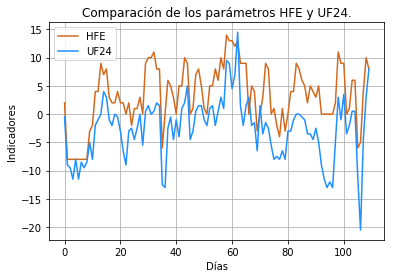

In [14]:
#Se grafican los dos arreglos para comparar valores
#Crear gráfica de evolución de temperatura mínima y máxima
Y1 = HFE
Y2 = UF24

plt.plot(Y1, label = "HFE", color = '#D2691E')   
plt.plot(Y2, label = "UF24", color = '#1E90FF')   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('Comparación de los parámetros HFE y UF24.')
plt.savefig('HFE_U24')
plt.show()

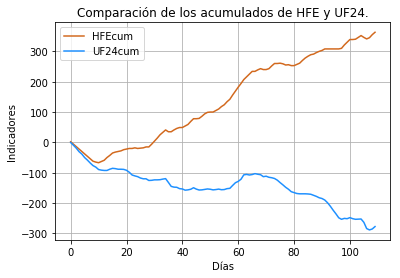

In [15]:
#Crear arreglos con la información de UF24 acumulado y HFE acumulado para realizar gráficas
HFEcum = data1['HFE'].cumsum()
UF24cum = data1['UF24'].cumsum()

#Se grafican los dos arreglos para comparar valores
#Crear gráfica de evolución de temperatura mínima y máxima
Y1 = HFEcum
Y2 = UF24cum

plt.plot(Y1, label = "HFEcum", color = '#D2691E')   
plt.plot(Y2, label = "UF24cum", color = '#1E90FF')   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('Comparación de los acumulados de HFE y UF24.')
plt.savefig('HFE_U24_cum')
plt.show()
